In [1]:
import numpy as np
import pickle
import sys
from matplotlib import pyplot as plt

In [2]:
# Given parameters
nx = 60
ny = 60
m=nx*ny
tf = 3.0
dt = 5.0e-3
nt = int(tf/dt)
xmin = -1; xmax = 1
ymin = -1; ymax = 1

# generate mesh grid
[xv,yv]=np.meshgrid(np.linspace(xmin,xmax,nx),np.linspace(ymin,ymax,ny),indexing='xy')
x=xv.flatten()
y=yv.flatten()

training_params = np.arange(80,121,5)
print("nt={}".format(nt))
print("training parameters={}".format(training_params))

file_name_SVD="./advection_model/ex9_SVD.p"
print(file_name_SVD)

nt=600
training parameters=[ 80  85  90  95 100 105 110 115 120]
./advection_model/ex9_SVD.p


In [4]:
# load snapshot
snapshot = np.array([])
for i in training_params:
    ex = np.load('./advection_data/ex9_interp_{}.npz'.format(i), allow_pickle = True)
    ex = ex.f.arr_0
    snapshot = np.append(snapshot, ex)
snapshot = snapshot.reshape(len(training_params)*(nt+1),-1)
print('data shape \t {}'.format(snapshot.shape))
print('data dtype \t {}'.format(snapshot.dtype))

snapshot_u = np.copy(snapshot)

# do svd decomposition
U_u,S_u,V_uT=np.linalg.svd(snapshot_u.T,full_matrices=False)

# save SVD
SVD={'U':U_u,'S':S_u,'VT':V_uT}
with open(file_name_SVD,'wb') as ff:
    pickle.dump(SVD,ff)

data shape 	 (5409, 3600)
data dtype 	 float64


# of POD Basis: [3 4 5 6]
./advection_result/ex9_POD_3_proj_result.p
accuracy: 97.30318781930852
./advection_result/ex9_POD_4_proj_result.p
accuracy: 99.4757967352703
./advection_result/ex9_POD_5_proj_result.p
accuracy: 99.84814770957593
./advection_result/ex9_POD_6_proj_result.p
accuracy: 99.92028818171119


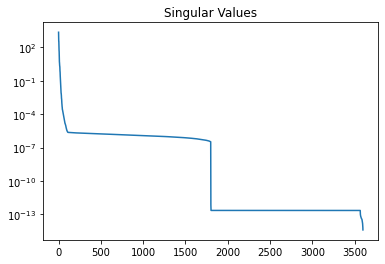

In [6]:
# file path
file_name_SVD="./advection_model/ex9_SVD.p"

basis_list=np.array([3,4,5,6])
print("# of POD Basis:",basis_list)

for ii in range(len(basis_list)):
    # POD basis
    POD_basis=basis_list[ii]

    # file path
    file_path_prj_result = "./advection_result/ex9_POD_"+str(POD_basis)+"_proj_result.p"
    print(file_path_prj_result)

    SVD = pickle.load(open(file_name_SVD,'rb'))
    phi_u = SVD['U'][:,:POD_basis]
    S_u=SVD['S']

    acc_u=np.sum(S_u[:POD_basis]**2)/np.sum(S_u**2)*100
    print("accuracy: {}".format(acc_u))
    
plt.figure()
plt.semilogy(S_u)
plt.title("Singular Values")
# plt.show()
plt.savefig("./advection_result/ex9_SVD.png")

# Projection error

In [5]:
import numpy as np
from scipy import sparse as sp
from scipy.sparse.linalg import spsolve
from matplotlib import pyplot as plt
import time, sys
import pickle

In [6]:
# Given parameters
nx = 60
ny = 60
tf = 3.0
dt = 5.0e-3
nt = int(tf/dt)
xmin = -1; xmax = 1
ymin = -1; ymax = 1

# generate mesh grid
[xv,yv]=np.meshgrid(np.linspace(xmin,xmax,nx),np.linspace(ymin,ymax,ny),indexing='xy')
x=xv.flatten()
y=yv.flatten()

multi_index_i,multi_index_j=np.meshgrid(np.arange(nx),np.arange(ny),indexing='xy')
full_multi_index=(multi_index_j.flatten(),multi_index_i.flatten())
free_multi_index=(multi_index_j[1:-1,1:-1].flatten(),multi_index_i[1:-1,1:-1].flatten())
x0_multi_index=(multi_index_j[1:-1,0].flatten(),multi_index_i[1:-1,0].flatten())
x1_multi_index=(multi_index_j[1:-1,-1].flatten(),multi_index_i[1:-1,-1].flatten())
y0_multi_index=(multi_index_j[0,1:-1].flatten(),multi_index_i[0,1:-1].flatten())
y1_multi_index=(multi_index_j[-1,1:-1].flatten(),multi_index_i[-1,1:-1].flatten())

dims=(ny,nx)
full_raveled_indicies=np.ravel_multi_index(full_multi_index,dims)
free_raveled_indicies=np.ravel_multi_index(free_multi_index,dims)
x0_raveled_indicies=np.ravel_multi_index(x0_multi_index,dims)
x1_raveled_indicies=np.ravel_multi_index(x1_multi_index,dims)
x01_raveled_indicies=np.concatenate((x0_raveled_indicies,x1_raveled_indicies))
y0_raveled_indicies=np.ravel_multi_index(y0_multi_index,dims)
y1_raveled_indicies=np.ravel_multi_index(y1_multi_index,dims)
y01_raveled_indicies=np.concatenate((y0_raveled_indicies,y1_raveled_indicies))
fixed_raveled_indicies=np.setdiff1d(full_raveled_indicies,free_raveled_indicies)

# measurements
msmt_idx=full_raveled_indicies

./advection_model/ex9_SVD.p
[3 4 5 6]
POD basis: 3
./advection_result/ex9_POD_3_proj_result.p


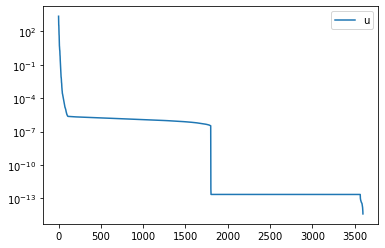

accuracy: 97.30318781930852

Time elapsed: 1.1997809410095215 sec
average relative error of u: 22.418990085138333%
maximum relative error of u: 28.938965028904732%

Time elapsed: 1.2645704746246338 sec
average relative error of u: 23.792630166588907%
maximum relative error of u: 31.09543729977553%

Time elapsed: 1.297027826309204 sec
average relative error of u: 25.044168944542793%
maximum relative error of u: 33.14665765592867%

Time elapsed: 1.2985239028930664 sec
average relative error of u: 26.148866861950566%
maximum relative error of u: 35.042504513538475%

Time elapsed: 1.2896671295166016 sec
average relative error of u: 27.09120426749318%
maximum relative error of u: 36.73623407140396%

Time elapsed: 1.3352611064910889 sec
average relative error of u: 27.870495136787515%
maximum relative error of u: 38.192270389257374%

Time elapsed: 1.2722437381744385 sec
average relative error of u: 28.503792984033893%
maximum relative error of u: 39.39232709179901%

Time elapsed: 1.286229848

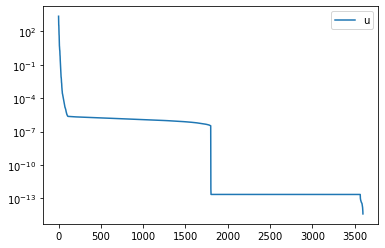

accuracy: 99.4757967352703

Time elapsed: 1.251343011856079 sec
average relative error of u: 15.679758220951268%
maximum relative error of u: 27.024114482482297%

Time elapsed: 1.316033124923706 sec
average relative error of u: 16.187918976261344%
maximum relative error of u: 27.928152507861707%

Time elapsed: 1.3717248439788818 sec
average relative error of u: 16.534753391649023%
maximum relative error of u: 28.527389270333487%

Time elapsed: 1.3843560218811035 sec
average relative error of u: 16.722633796962747%
maximum relative error of u: 28.80635139162096%

Time elapsed: 1.331423282623291 sec
average relative error of u: 16.775348782105322%
maximum relative error of u: 28.779207111419257%

Time elapsed: 1.2992050647735596 sec
average relative error of u: 16.744419633198667%
maximum relative error of u: 28.49965639181007%

Time elapsed: 1.3752977848052979 sec
average relative error of u: 16.710826577728547%
maximum relative error of u: 28.065345848873065%

Time elapsed: 1.343661308

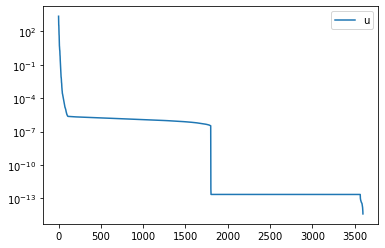

accuracy: 99.84814770957593

Time elapsed: 1.9905102252960205 sec
average relative error of u: 7.7813756993783745%
maximum relative error of u: 9.619503601376406%

Time elapsed: 2.0035579204559326 sec
average relative error of u: 7.65586091349036%
maximum relative error of u: 9.542568427772775%

Time elapsed: 2.0603511333465576 sec
average relative error of u: 7.405929853032746%
maximum relative error of u: 9.339182791624236%

Time elapsed: 2.051581382751465 sec
average relative error of u: 7.073543658548365%
maximum relative error of u: 9.069544778284676%

Time elapsed: 2.125509262084961 sec
average relative error of u: 6.747183887006292%
maximum relative error of u: 8.854820387299245%

Time elapsed: 1.9956517219543457 sec
average relative error of u: 6.574728326921381%
maximum relative error of u: 8.888141724271687%

Time elapsed: 2.075887680053711 sec
average relative error of u: 6.744255808049496%
maximum relative error of u: 9.402369692874007%

Time elapsed: 2.092820882797241 sec


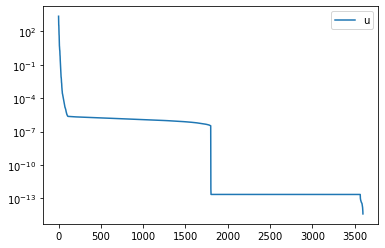

accuracy: 99.92028818171119

Time elapsed: 1.921567678451538 sec
average relative error of u: 6.962658105603463%
maximum relative error of u: 8.686536892447117%

Time elapsed: 1.9457855224609375 sec
average relative error of u: 6.78173041908953%
maximum relative error of u: 8.51353057807572%

Time elapsed: 1.9614944458007812 sec
average relative error of u: 6.490003254136764%
maximum relative error of u: 8.222772703312135%

Time elapsed: 1.9189915657043457 sec
average relative error of u: 6.140620344500222%
maximum relative error of u: 7.884350086883569%

Time elapsed: 1.9925458431243896 sec
average relative error of u: 5.840154832822677%
maximum relative error of u: 7.639584152261349%

Time elapsed: 1.889575481414795 sec
average relative error of u: 5.757638394750305%
maximum relative error of u: 7.764210508165391%

Time elapsed: 1.9750914573669434 sec
average relative error of u: 6.08300408246508%
maximum relative error of u: 8.365010117790717%

Time elapsed: 1.9788804054260254 sec
a

In [8]:
# file path
file_name_SVD="./advection_model/ex9_SVD.p"
print(file_name_SVD)

basis_list=np.array([3,4,5,6])
print(basis_list)

for ii in range(len(basis_list)):
    # POD basis
    POD_basis=basis_list[ii]
    print("")
    print("POD basis: {}".format(POD_basis))

    # file path
    file_path_prj_result = "./advection_result/ex9_POD_"+str(POD_basis)+"_proj_result.p"
    print(file_path_prj_result)

    SVD = pickle.load(open(file_name_SVD,'rb'))
    phi_u = SVD['U'][:,:POD_basis]

    plt.figure()
    plt.semilogy(S_u)
    plt.legend('u')
    plt.show()
    acc_u=np.sum(S_u[:POD_basis]**2)/np.sum(S_u**2)*100
    print("accuracy: {}".format(acc_u))

    phim_u=phi_u[msmt_idx]
    phim_u_pinv=np.linalg.pinv(phim_u)

    results={'avg_rel_err':[],'rel_err':[],'elapsed_time':[]}

    for FOM_parameter in training_params:
        # Load FOM solution
        ex = np.load('./advection_data/ex9_interp_{}.npz'.format(FOM_parameter), allow_pickle = True)
        ex = ex.f.arr_0
        u_full = ex.reshape(nt+1,-1)

        # take measurments
        um = u_full[:,msmt_idx]

        # Initial condition
        u0=u_full[0]
        u_ref = u0

        # Gappy POD
        t_start_gappyPOD=time.time()

        # solution
        u_gappyPOD=np.zeros((nt+1,ny*nx))
        u_hat=np.zeros((nt+1,POD_basis))

        # IC
        u_hat0=np.zeros(POD_basis)
        u_gappyPOD[0]=np.copy(u0)

        for n in range(nt):
            u_hat[n+1] = phim_u_pinv.dot(um[n+1]-u_ref[msmt_idx])
            u_gappyPOD[n+1] = u_ref + phi_u.dot(u_hat[n+1])

        # elapsed time
        t_elapsed_gappyPOD=time.time()-t_start_gappyPOD
        print()
        print('Time elapsed: {} sec'.format(t_elapsed_gappyPOD))

        # error
        u_rel_err_gappyPOD=np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)/np.linalg.norm(u_full,ord=2,axis=1)*100
        u_avg_rel_err=np.sqrt(np.sum(np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)**2))/np.sqrt(np.sum(np.linalg.norm(u_full,ord=2,axis=1)**2))*100
        print("average relative error of u: {}%".format(u_avg_rel_err))
        print("maximum relative error of u: {}%".format(np.max(u_rel_err_gappyPOD)))

        # save result
        results['avg_rel_err'].append(u_avg_rel_err)
        results['rel_err'].append(u_rel_err_gappyPOD)
        results['elapsed_time'].append(t_elapsed_gappyPOD)

    results['avg_rel_err']=np.array(results['avg_rel_err'])
    results['rel_err']=np.array(results['rel_err'])
    results['elapsed_time']=np.array(results['elapsed_time'])

    with open(file=file_path_prj_result, mode='wb') as ff:
        pickle.dump(results, ff)

# Plot other cases together

In [3]:
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=28)  # fontsize of the figure title

linestyle=['solid','dotted','dashed','dashdot']

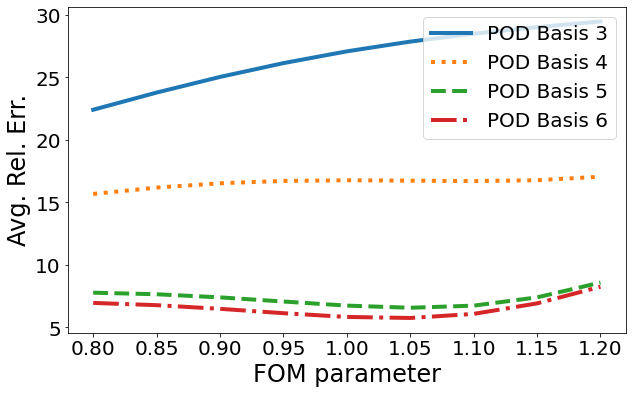

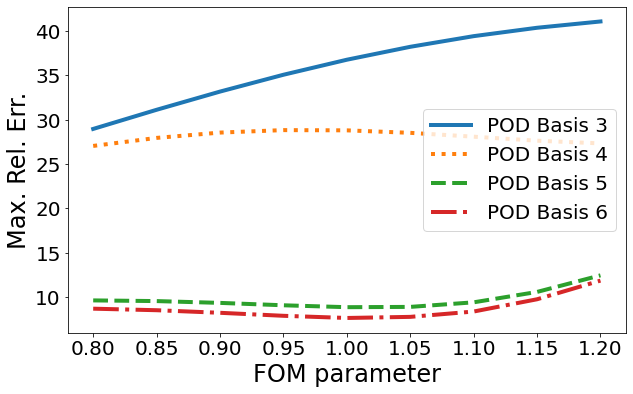

In [4]:
basis_list=np.array([3,4,5,6])

plt.figure(num=1,figsize=(10,6))
plt.figure(num=2,figsize=(10,6))
for i in range(len(basis_list)):
    POD_basis = basis_list[i]
    file_path_prj_result = "./advection_result/ex9_POD_"+str(POD_basis)+"_proj_result.p"
    with open(file=file_path_prj_result, mode='rb') as ff:
        results=pickle.load(ff)   
    plt.figure(num=1)
    plt.plot(training_params/100,results['avg_rel_err'],linestyle=linestyle[i],linewidth=4)

    plt.figure(num=2)
    plt.plot(training_params/100,results['rel_err'].max(axis=1),linestyle=linestyle[i],linewidth=4)

plt.figure(num=1)    
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["POD Basis "+str(POD_basis) for POD_basis in basis_list])
plt.savefig("./advection_result/ex9_POD_proj_avg_rel_err.png")

plt.figure(num=2)
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["POD Basis "+str(POD_basis) for POD_basis in basis_list])
plt.savefig("./advection_result/ex9_POD_proj_max_rel_err.png")

In [5]:
print(basis_list)
print(training_params)

[3 4 5 6]
[ 80  85  90  95 100 105 110 115 120]


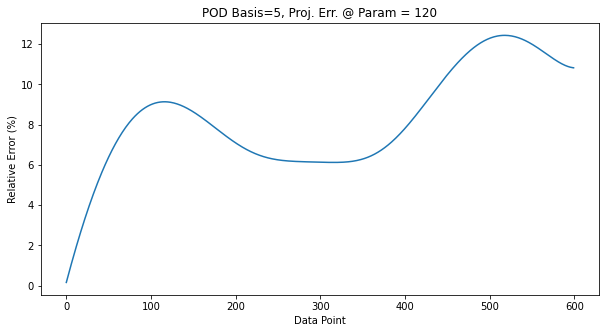

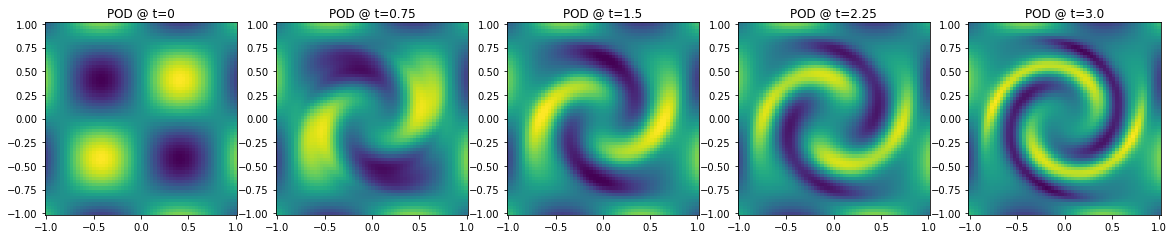

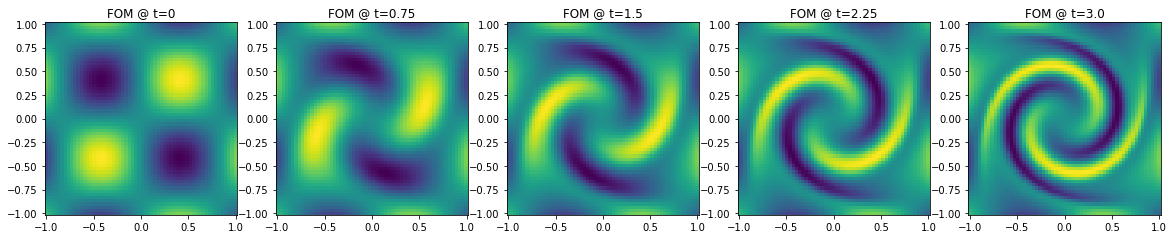

In [11]:
i=2; j=-1        
POD_basis=basis_list[i]
param=training_params[j]

file_path_prj_result = "./advection_result/ex9_POD_"+str(POD_basis)+"_proj_result.p"
with open(file=file_path_prj_result, mode='rb') as ff:
    results=pickle.load(ff)  

u_rel_err_gappyPOD=results['rel_err'][j,1:]
plt.figure(figsize=(10,5))

plt.plot(u_rel_err_gappyPOD.flatten())
plt.xlabel('Data Point')
plt.ylabel('Relative Error (%)')
plt.title('POD Basis={}, Proj. Err. @ Param = {}'.format(POD_basis,param))
plt.show()

# plot original data
vmin=0; vmax=1

# AE
plt.figure(figsize=(20,4))

plt.subplot(1,5,1)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[0].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('POD @ t=0')

plt.subplot(1,5,2)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[int(nt/4)].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('POD @ t={}'.format(dt*int(nt/4)))

plt.subplot(1,5,3)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[int(nt/4)*2].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('POD @ t={}'.format(dt*int(nt/4)*2))

plt.subplot(1,5,4)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[int(nt/4)*3].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('POD @ t={}'.format(dt*int(nt/4)*3))

plt.subplot(1,5,5)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[nt].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('POD @ t={}'.format(dt*nt))

plt.show()

# FOM
plt.figure(figsize=(20,4))

plt.subplot(1,5,1)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[0].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('FOM @ t=0')

plt.subplot(1,5,2)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[int(nt/4)].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('FOM @ t={}'.format(dt*int(nt/4)))

plt.subplot(1,5,3)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[int(nt/4)*2].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('FOM @ t={}'.format(dt*int(nt/4)*2))

plt.subplot(1,5,4)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[int(nt/4)*3].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('FOM @ t={}'.format(dt*int(nt/4)*3))

plt.subplot(1,5,5)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[nt].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('FOM @ t={}'.format(dt*nt))

plt.show()